<a href="https://colab.research.google.com/github/hearts2/Senior-Communication/blob/main/%08(%ED%98%84%ED%9D%AC%EC%98%81)_%EC%8A%A4%ED%83%A0%EB%8B%A4%EB%93%9C%2B%EB%A1%9C%EA%B7%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Standard+logscale

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 경고 무시
import warnings
warnings.filterwarnings(action = 'ignore')

# 코렙 한글깨짐
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 코렙에서 한글 깨짐 현상 있을때 설치 후 밑코드로 해결완료

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/시소프로젝트/NEW(공모전용)/(현희영)주민센터 - 스테나인 전용.xlsx', thousands=',')
data.drop(columns='Unnamed: 0')

,자치구,동,시설명,연면적,주변특성,대중교통,동별전체인구,60세~,60세~/전체인구,60세~/구별전체,비율,디지털정보지수
0,종로구,청운효자동,청운효자동 주민센터,965.52,0,1,11978,2945,0.245867,0.075281,336867.539821,2933.53
1,종로구,사직동,사직동 주민센터,346.65,3,1,9372,2468,0.263338,0.063088,282305.293147,2406.94
2,종로구,종로1.2.3.4가동,종로1-4가동 주민센터,1981.09,4,5,7197,2682,0.372655,0.068558,306783.953096,2305.52
3,종로구,삼청동,삼청동 주민센터,998.10,1,3,2456,827,0.336726,0.021140,94597.438184,680.87
4,종로구,가회동,가회동 주민센터,1032.08,1,2,4088,1184,0.289628,0.030266,135433.333501,1118.11
...,...,...,...,...,...,...,...,...,...,...,...,...
504,강동구,천호2동,해공노인복지관,598.00,3,0,33154,8694,0.262231,0.078107,495605.089585,8661.42
505,성북구,삼선동,삼선실버복지센터,542.11,1,0,22871,5563,0.243234,0.052237,291418.455170,5682.14
506,금천구,독산1동,금천한내어르신복지센터,2003.00,1,3,44873,8892,0.198159,0.147165,527426.512680,9862.98
507,서초구,방배3동,방배느티나무쉼터,519.50,0,3,18783,4902,0.260981,0.056415,376085.632804,4947.17


In [ ]:
others = data.iloc[:,4:]

In [ ]:
others.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   연면적        509 non-null    float64
 1   주변특성       509 non-null    int64  
 2   대중교통       509 non-null    int64  
 3   동별전체인구     509 non-null    int64  
 4   60세~       509 non-null    int64  
 5   60세~/전체인구  509 non-null    float64
 6   60세~/구별전체  509 non-null    float64
 7   비율         509 non-null    float64
 8   디지털정보지수    509 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 35.9 KB


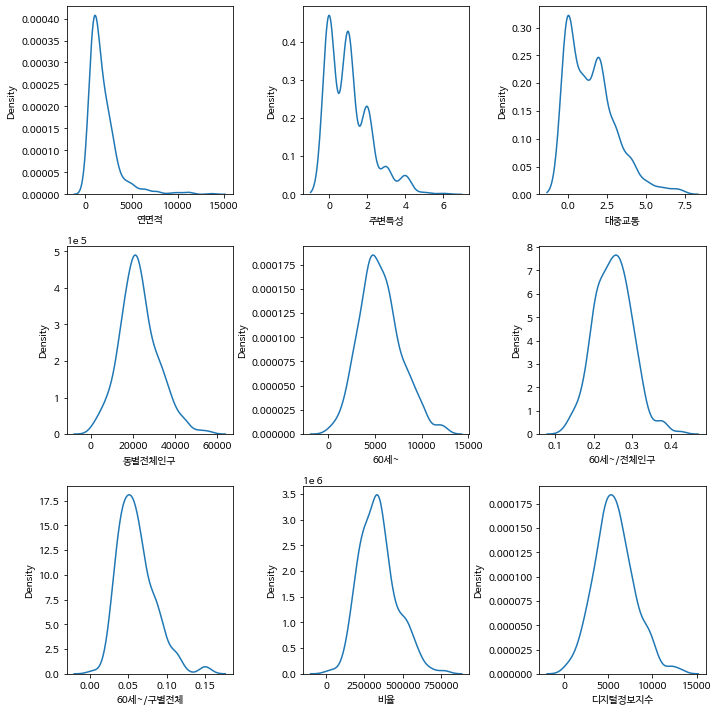

In [ ]:
# 연속형 분포확인
fig, ax = plt.subplots(3,3, figsize=(10,10))
for i, valu in enumerate(others):
    m = i//3
    n = i % 3
    sns.kdeplot(x =valu, data = others, ax=ax[m,n])

plt.tight_layout()
plt.show()

In [ ]:
# StandardScaler정규화를 진행한다.

from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform((others))
data_scale_log=pd.DataFrame(data=scaled_data, columns=others.columns)

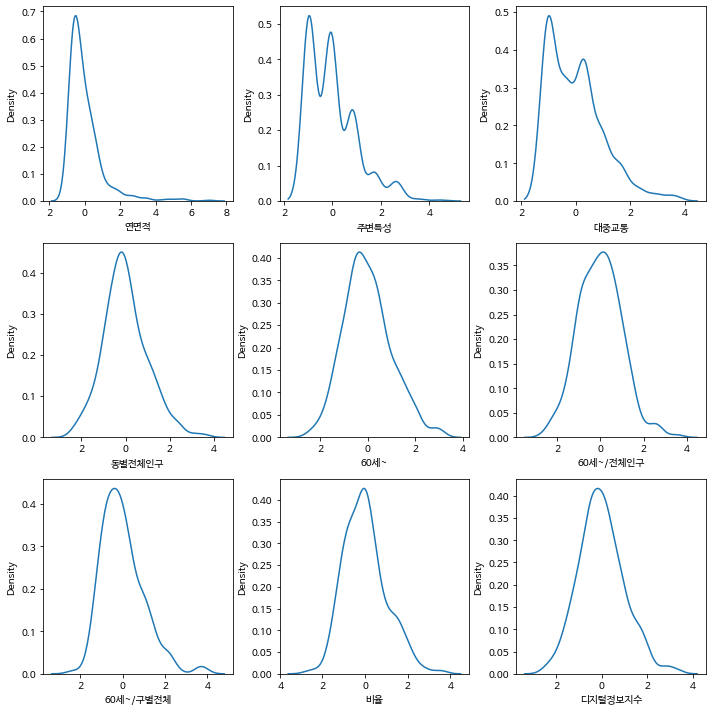

In [ ]:
fig, ax = plt.subplots(3,3, figsize = (10,10))
for i, valu in enumerate(data_scale_log):
    m = i//3
    n = i % 3
    sns.kdeplot(x =valu, data = data_scale_log, ax=ax[m,n])
plt.tight_layout()
plt.show()